In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from itertools import cycle
from scipy.spatial import Voronoi, voronoi_plot_2d
import seaborn as sns
style.use("ggplot")
%matplotlib inline

- Primero realizamos un cambio de escala de los datos usando el dataset hausing

In [33]:
scaler = MinMaxScaler()
data = pd.read_csv('housing.csv',sep=";")
varNumeric = list(data.select_dtypes(exclude=['object']).columns)
data[varNumeric]= scaler.fit_transform(data[varNumeric])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


- Creamos una grafica donde veamos las diferentes distribuciones de dispersion de los datos

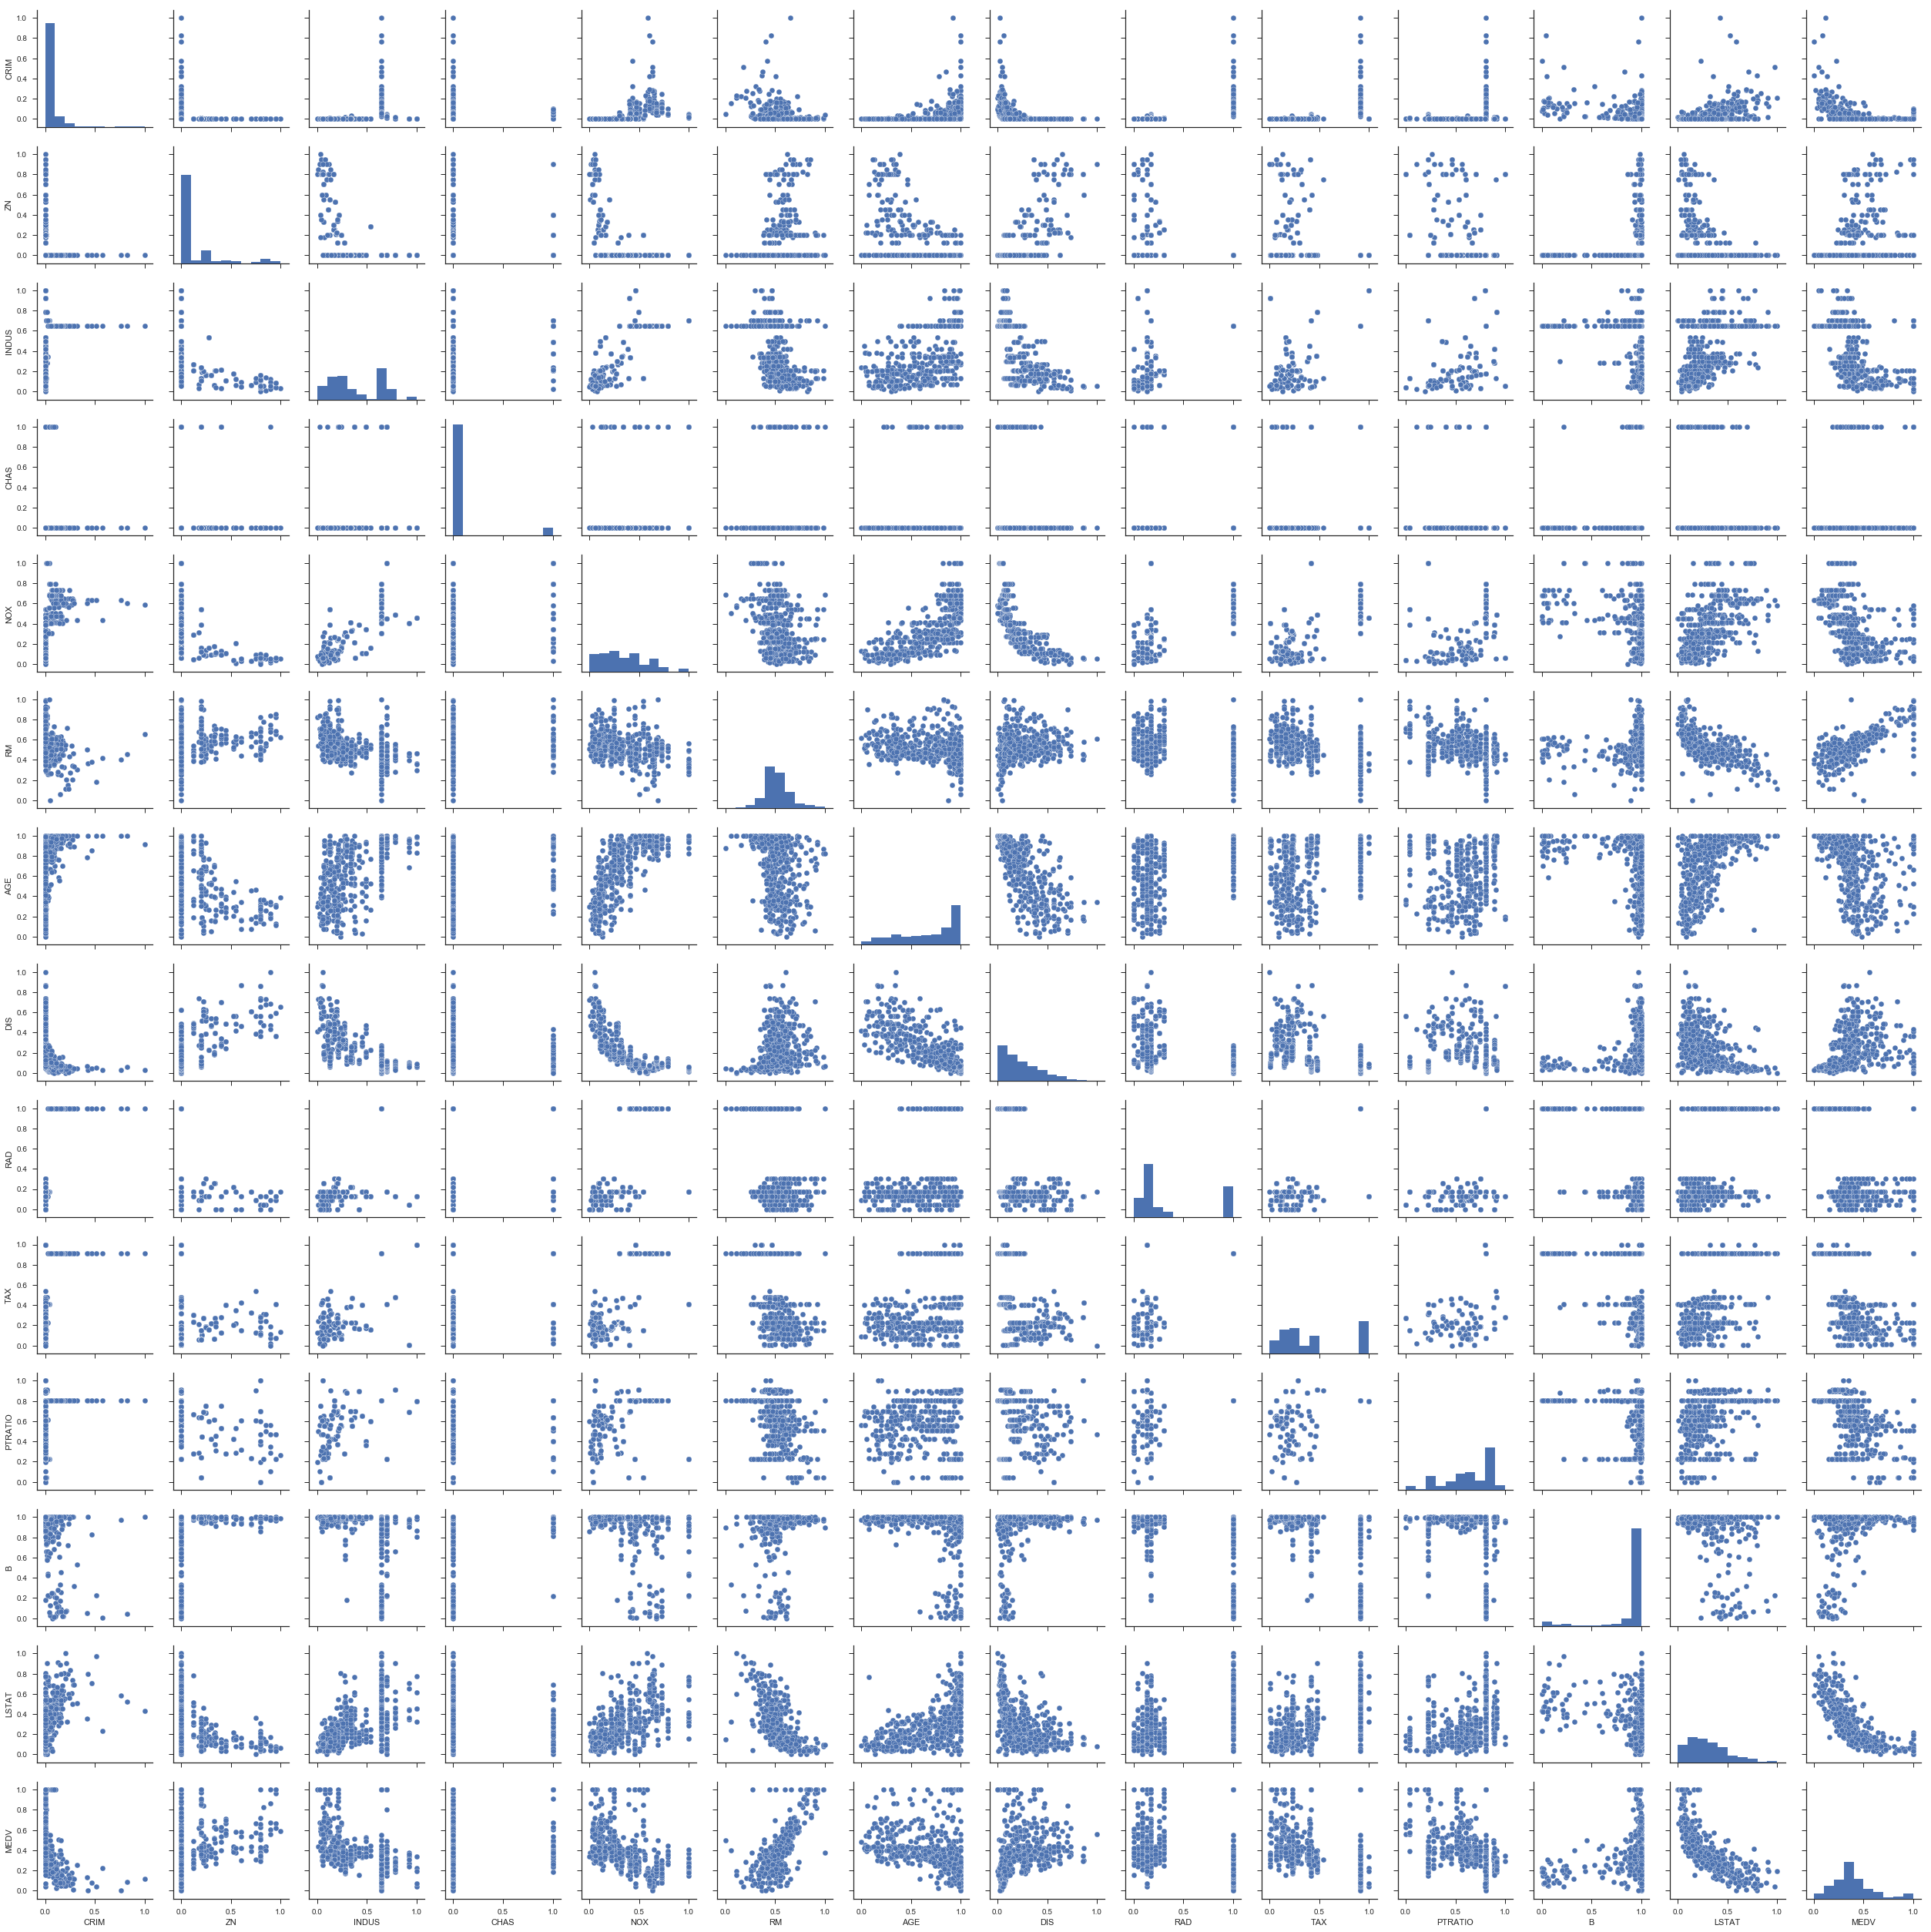

In [34]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)

- De la grafica anterior seleccionamos una de las agruapaciones de interes para crear los grupos (Edad  - Valor Medio)<br><br> Luego graficamos varios grupos marcando las fronteras de desición.

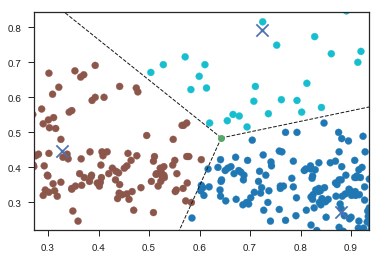

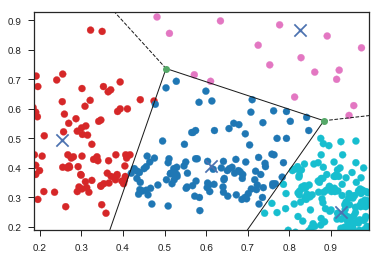

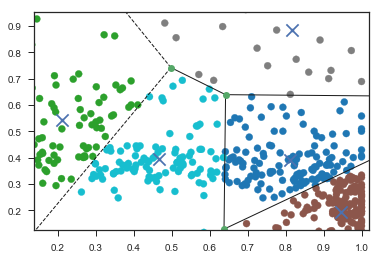

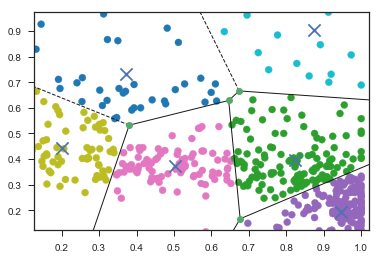

In [67]:
x = data[['AGE','MEDV']]
X= x.values

plt.figure(figsize = (18,18))
for i in range(1, 5):
    #------------Kmeans--------------------
    kmeans = KMeans(n_clusters=(i+2))
    kmeans.fit(X)
    y_pred = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_
    #print(centroids)
    #------------Grafico--------------------
    vor = Voronoi(centroids)
    voronoi_plot_2d(vor)

    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap ='tab10')
    plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 8, zorder = 10)


In [1]:
from rpy2.robjects.packages import importr

ModuleNotFoundError: No module named 'rpy2'